# 단순 선형 회귀

# < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

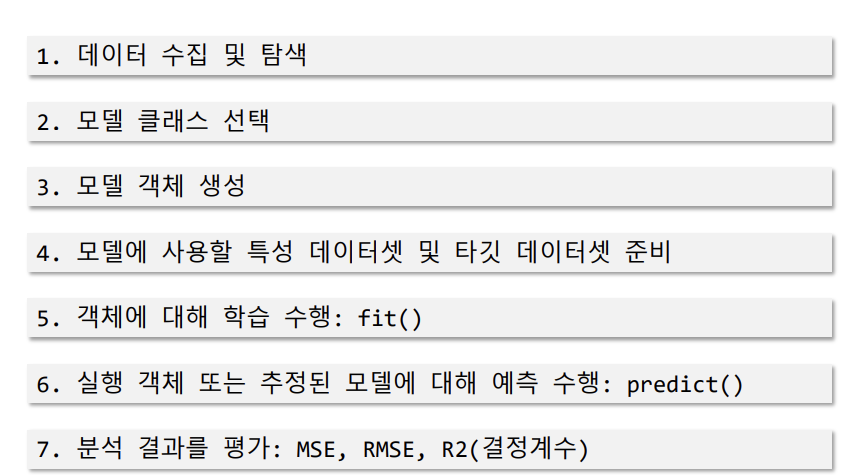

### 필요한 모듈 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [2]:
beer = pd.read_csv("./data/beer.csv")
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


### 데이터 탐색

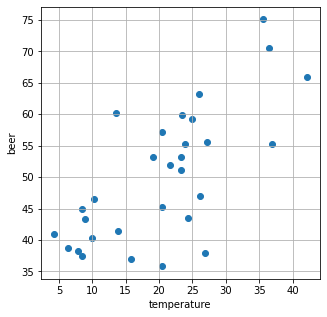

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(beer['temperature'],beer['beer'])
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

In [ ]:
# 독립 변수, 종속 변수 확인


In [5]:
beer['temperature']

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [ ]:
# 종속 변수 확인, 레코드 수 확인

In [4]:
print(beer['beer'])
print(len(beer))

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64
30


###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [15]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
import numpy as np

#독립변수, 종속변수 데이터셋 준비
X=np.array(beer['temperature']).reshape(-1,1) # -1!
y=beer['beer']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(\
                                                  X,y,test_size=0.2,\
                                                  random_state=1)

In [7]:
X

array([[20.5],
       [25. ],
       [10. ],
       [26.9],
       [15.8],
       [ 4.2],
       [13.5],
       [26. ],
       [23.3],
       [ 8.5],
       [26.2],
       [19.1],
       [24.3],
       [23.3],
       [ 8.4],
       [23.5],
       [13.9],
       [35.5],
       [27.2],
       [20.5],
       [10.2],
       [20.5],
       [21.6],
       [ 7.9],
       [42.2],
       [23.9],
       [36.9],
       [ 8.9],
       [36.4],
       [ 6.4]])

### 모델 구축

In [16]:
from sklearn.linear_model import LinearRegression
#모델 클래스 선택 후 인스턴스 객체 생성

lr=LinearRegression()

In [17]:
# 학습 수행
reg = lr.fit(X_train,y_train)

In [18]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_,reg.intercept_#왜 intercept?

(array([0.69705648]), 36.066665415661056)

In [19]:
#회귀식
print("y= {:2f}x + {:.3f}".format(reg.coef_[0], reg.intercept_))

y= 0.697056x + 36.067


In [20]:
# 구축된 모델에서 예측 수행
y_pred=reg.predict(X_test)
print(np.round(y_pred,2))

[60.81 50.36 54.33 50.36 41.92 43.18]


### 모델 성능 평가

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

#MSE
mse = mean_squared_error(y_test,y_pred)

#RMSE
rmse = np.sqrt(mse)

print("MSE:",np.round(mse, 3))
print("RMSE:",np.round(rmse, 3))

MSE: 91.347
RMSE: 9.558


In [22]:
#결정계수 R2
r2= r2_score(y_test,y_pred)
print("R2: ",np.round(r2,3))

R2:  0.485


In [23]:
print(reg.score(X_test,y_test))

0.4845648129795146


### 시각화

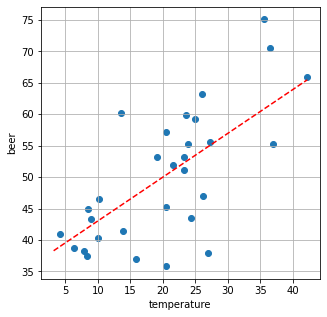

In [25]:
#y = 0.697056X + 36.06 시각화

plt.figure(figsize=(5,5))
xx=np.arange(beer['temperature'].min() - 1,\
            beer['temperature'].max() + 1)
yy= reg.predict(xx.reshape(len(xx),1))

plt.plot(xx,yy,linestyle='--',color='red')
# 수집한 데이터셋 시각화

plt.scatter(beer['temperature'],beer['beer'])

plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

In [26]:
xx

array([ 3.2,  4.2,  5.2,  6.2,  7.2,  8.2,  9.2, 10.2, 11.2, 12.2, 13.2,
       14.2, 15.2, 16.2, 17.2, 18.2, 19.2, 20.2, 21.2, 22.2, 23.2, 24.2,
       25.2, 26.2, 27.2, 28.2, 29.2, 30.2, 31.2, 32.2, 33.2, 34.2, 35.2,
       36.2, 37.2, 38.2, 39.2, 40.2, 41.2, 42.2])

# 응용1. 나이, 키의 관계를 회귀 분석

In [ ]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



#### 데이터 생성/수집

In [27]:
data_df = pd.read_csv("./data/age_height.csv" )

#### 데이터 탐색

In [ ]:
# 데이터 분포 시각화

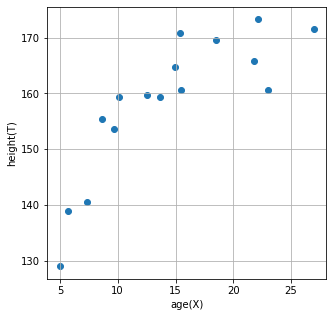

In [34]:
plt.figure(figsize=(5,5))
plt.scatter(data_df['age(X)'],data_df['height(T)'])
plt.xlabel('age(X)')
plt.ylabel('height(T)')
plt.grid()
plt.show()

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [28]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
X=np.array(data_df['age(X)']).reshape(-1,1)
y=data_df['height(T)']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(\
                                                  X,y,test_size=0.2,\
                                                  random_state=1)

In [29]:
#####모델 구축 및 예측
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

reg=lr.fit(X_train,y_train)

In [30]:
#모델 객체 생성  및 학습

# 예측 수행
y_pred= reg.predict(X_test)
print(np.round(y_pred,2))

[156.85 177.56 158.41 145.98]


In [ ]:
#####모델 성능 평가

#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#RMSE : numpy의 sqrt() 함수 사용


# MSE

#RMSE

#결정계수 R2

#회귀식


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

#MSE
mse = mean_squared_error(y_test,y_pred)

#RMSE
rmse = np.sqrt(mse)

print("MSE:",np.round(mse, 3))
print("RMSE:",np.round(rmse, 3))

MSE: 83.495
RMSE: 9.138


In [32]:
#결정계수 R2
r2= r2_score(y_test,y_pred)
print("R2: ",np.round(r2,3))

R2:  0.663


In [ ]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화

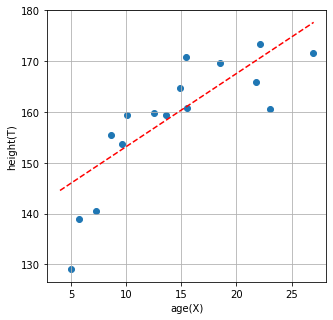

In [35]:
#y = 0.697056X + 36.06 시각화
plt.figure(figsize=(5,5))
xx=np.arange(data_df['age(X)'].min() - 1,\
            data_df['age(X)'].max() + 1)
yy= reg.predict(xx.reshape(len(xx),1))

plt.plot(xx,yy,linestyle='--',color='red')

# 수집한 데이터셋 시각화
plt.scatter(data_df['age(X)'],data_df['height(T)'])

plt.xlabel('age')
plt.ylabel('height')
plt.grid()
plt.show()

# < 스탯츠모델에서 단순선형회귀 수행>

In [42]:
#스탯츠모델 import
import statsmodels.api as sm

# 맥주 데이터 
# 데이터 생성

beer = pd.read_csv('./data/beer.csv')

#독립변수, 종속변수 데이터셋 준비
import numpy as np

X = np.array(beer['temperature']).reshape(-1,1)
y=beer['beer']

X_train, X_test, y_train, y_test = train_test_split(\
                                                   X,y, test_size = 0.2,
                                                   random_state=1)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [44]:
# 스탯츠모델
lr= sm.OLS(y_train, X_train)

reg = lr.fit()

In [45]:
# 성능 평가
y_pred = reg.predict(X_test)

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.63
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           9.50e-05
Time:                        11:42:49   Log-Likelihood:                -79.854
No. Observations:                  24   AIC:                             163.7
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0667      3.315     10.881      0.0

# 응용2: 보스턴 집값 선형 회귀(statsmodel)

### 데이터 수집

In [47]:
from sklearn.datasets import load_boston

boston=load_boston()

### 데이터 탐색

In [48]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [50]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [51]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [52]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [53]:
boston.data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

### 데이터 준비

In [ ]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환

In [56]:
import pandas as pd

df= pd.DataFrame(boston.data, columns=boston.feature_names)

In [57]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [61]:
X=pd.DataFrame(df['RM'])
y= boston.target

In [62]:
X[:5]

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


### 학습용/ 검증용 데이터 분리

In [ ]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라


In [63]:
# X=np.array(data_df['age(X)']).reshape(-1,1)
# y=data_df['height(T)']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(\
                                                  X,y,test_size=0.3,\
                                                  random_state=1)

In [64]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

reg=lr.fit(X_train,y_train)

In [65]:
y_pred= reg.predict(X_test)
print(np.round(y_pred,2))

[27.38 26.08 20.45 19.16 14.8  23.34 25.53 20.8  19.78 23.72 26.54 27.59
 17.92 18.39 20.39 16.88 25.69 43.25 21.57 11.11 17.7  17.05 24.99 23.71
 22.65 19.32 21.01 20.31 33.06 15.03 25.09 16.85 37.41 22.32 21.41 19.57
 23.08 29.9   4.44 21.16 23.01 22.82 25.42 21.57 21.76 27.17 35.44 19.24
 21.05 23.62 28.49 23.22 23.83 22.89 12.52 24.05 18.94 21.23 20.11 39.21
 23.67 25.53 18.05 23.14 15.22 28.49 39.97 24.76 20.27 18.96 22.84  8.79
 11.42 25.9  21.27 18.18 28.79 24.03 24.51 29.91 23.84 20.37 30.22 25.52
 24.34 23.11 23.72 23.84 18.45 23.03 28.45 43.07 20.05 20.3  21.9  20.27
 25.21 23.94 39.37 21.85 18.82 24.3  21.63 21.42 14.08 22.16 16.51 22.31
 21.49 26.8  32.63 23.72 21.83 32.21 31.47 30.16 20.07 15.59 28.86 39.63
 19.08 26.36 26.71 22.32 24.98 20.36 21.27 21.21 16.57 26.35 18.38 23.43
 21.98 12.04 25.43 30.65 15.14 19.99 35.13 28.39 19.65 21.47 18.81 24.27
 27.48 21.11 23.8  20.22 25.48 19.87 30.37 18.61]


In [66]:
from sklearn.metrics import mean_squared_error, r2_score

#MSE
mse = mean_squared_error(y_test,y_pred)

#RMSE
rmse = np.sqrt(mse)

print("MSE:",np.round(mse, 3))
print("RMSE:",np.round(rmse, 3))

MSE: 36.517
RMSE: 6.043


In [67]:
#결정계수 R2
r2= r2_score(y_test,y_pred)
print("R2: ",np.round(r2,3))

R2:  0.602


### 모델 구축

### 모델 평가

In [68]:
reg.coef_, reg.intercept_

(array([8.46109164]), -30.571032410898336)

### 시각화

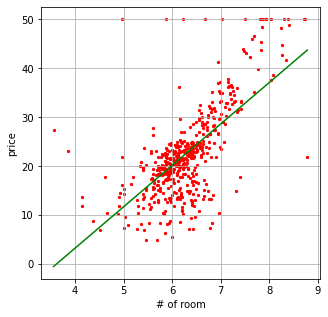

In [72]:
#방의 갯수와 주택 중간 가격 관계 시각화

#y=8.46 x - 30.57

plt.figure(figsize=(5,5))
plt.scatter(X,y,c='r',s=5)

xx=np.linspace(X.min(),X.max())
yy= reg.predict(xx.reshape(len(xx),1))
plt.plot(xx,yy, linestyle='-', color='g')
plt.xlabel("# of room")
plt.ylabel("price")
plt.grid()
plt.show()